In [18]:
import pandas as pd               
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from keras.optimizers import SGD
from keras.callbacks import History 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import MaxPooling1D

%matplotlib inline                
plt.rcParams["figure.figsize"] = [16, 8]

import matplotlib
import matplotlib.pyplot as plt

history = History()
history_testing = History()

In [19]:
df_init = df = pd.read_csv('maintenance_data.csv')
#Convert strings to discrete integers
try:
    mymap = {'TeamA':1, 'TeamB':2, 'TeamC':3, 'Provider1':1, 'Provider2':2, 'Provider3':3, 'Provider4':4}
    df = df.applymap(lambda s: mymap.get(s) if s in mymap else s)
except:
    pass  

X = df.drop('broken', axis=1).values
Y = df.broken.values[np.newaxis].T
df.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,1,4
1,81,1,72.075938,103.065701,87.271062,3,4
2,60,0,96.272254,77.801376,112.196170,1,1
3,86,1,94.406461,108.493608,72.025374,3,2
4,34,0,97.752899,99.413492,103.756271,2,1


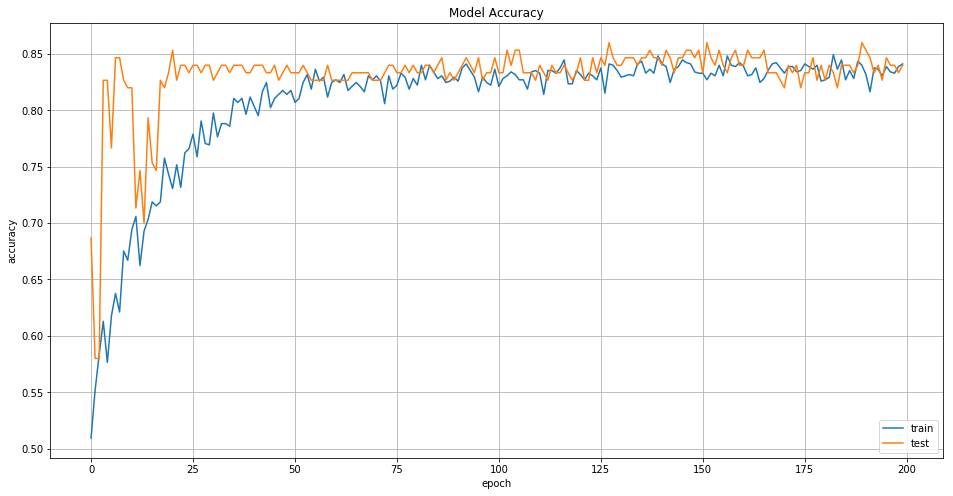

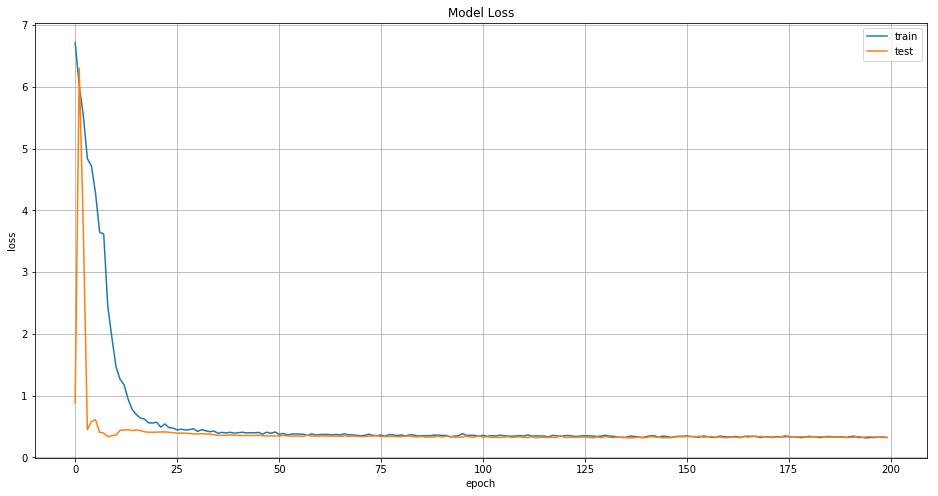

In [20]:
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=6))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X, Y, epochs=200, verbose=0, validation_split=0.15, callbacks=[history])

#Accuracy during training epochs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.grid()
plt.show()

#Loss during training epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid()
plt.show()

In [21]:
print(pd.DataFrame(history.history['val_acc']).mean(), pd.DataFrame(history.history['val_acc']).max())

0    0.831033
dtype: float64 0    0.86
dtype: float64
